In [9]:
%reload_ext autoreload
%autoreload 2

import sys, os, glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.constants import speed_of_light

sys.path.append('../driver')
import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
path=os.path.abspath(os.getcwd())
os.chdir(path)


In [10]:
os.listdir('../../../messungen/21 03 01 BlueFors TDR/tdr_data')

['161K test_2021-03-02 08-27-07.csv',
 '161K test_2021-03-02 08-29-49.csv',
 '161K test_2021-03-02 08-48-33.csv',
 '161K test_2021-03-02 11-27-12.csv',
 '275K test_2021-03-03 10-05-34.csv',
 '281K test_2021-03-03 14-35-52.csv',
 '4K test_2021-03-01 19-36-27.csv',
 '4K test_2021-03-01 20-07-59.csv']

In [11]:
def show_list(loc='../../../messungen/21 03 01 BlueFors TDR/tdr_data/'):
        print('Choose name from:')
        liste=os.listdir(loc)
        for l in liste:
            print(l[:-4])

In [12]:
def fft(data=None,
        name=None,
        loc='../../../messungen/21 03 01 BlueFors TDR/tdr_data/',
        fig=1,
        plotter=True,
        showlist=True):

    check=True
    if data is not None:
        datas=data
    elif name is not None:
        dt={'names':('f', 'S11f', 'S22f'),
            'formats':(np.float64,np.complex128, np.complex128)}
        datas=np.genfromtxt(loc+'%s.csv'%name, delimiter=",", dtype=dt)
    else:
        show_list(loc=loc)
        check=False
        d='no output'

    if check is True:
        f=datas['f']
        S11f=datas['S11f']
        S22f=datas['S22f']
        
        S11t=np.concatenate((np.flip(S11f,axis=0),np.zeros(1),S11f))
        S11t=np.flip(np.fft.ifft(S11t, norm='ortho')[len(S11f)+1:],axis=0)
        
        S22t=np.concatenate((np.flip(S22f,axis=0),np.zeros(1),S22f))
        S22t=np.flip(np.fft.ifft(S22t, norm='ortho')[len(S22f)+1:],axis=0)
        
        eff=np.concatenate((-np.flip(f,axis=0),np.zeros(1),f))
        t=np.fft.ifftshift(np.fft.fftfreq(len(eff),d=(eff[1]-eff[0])*2*np.pi))
        t=t[len(S22f)+1:]
        s=t/2*speed_of_light*.7*100 #cm
        
        R11f=20*np.log10(np.abs(S11f))
        R22f=20*np.log10(np.abs(S22f))
        R11t=20*np.log10(np.abs(S11t))
        R22t=20*np.log10(np.abs(S22t))

        dt={'names':('f', 'S11f', 'S22f', 'R11f', 'R22f',
                     't','s', 'S11t', 'S22t', 'R11t', 'R22t'),
            'formats':(np.float64,np.complex128, np.complex128,
                       np.float64,np.float64,np.float64,
                       np.float64,np.complex128, np.complex128,
                       np.float64,np.float64)}
        d=np.zeros(len(f), dtype=dt)
        
        d['f']=f
        d['S11f']=S11f
        d['S22f']=S22f
        d['R11f']=R11f
        d['R22f']=R22f
        d['t']=t
        d['s']=s
        d['S11t']=S11t
        d['S22t']=S22t
        d['R11t']=R11t
        d['R22t']=R22t

        if plotter==True:
            plt.figure(fig)
            plt.semilogx(s,R22t,'-', label='$R_{22}$', c=cpd.images()(.5))
            plt.semilogx(s,R11t,'-', label='$R_{11}$', c=cpd.images(color='magenta')(.5))
            plt.legend()
            plt.grid()
            plt.ylabel('Reflexion $R(f)$ [dB]')
            plt.xlabel('distance $tc_0$ [cm]')
    return d

In [ ]:
show_list()
d_4K=fft(fig=0, name='4K test_2021-03-01 20-07-59', plotter=False)
d_160K=fft(fig=1, name='161K test_2021-03-02 11-27-12', plotter=False)
d_RT=fft(fig=2, name='281K test_2021-03-03 14-35-52', plotter=False)

In [ ]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)
fig, ax = plt.subplots(2, 1, sharex=True, figsize=[6,3])
plt.subplots_adjust(hspace=0,bottom=0, top=1)

ax[0].plot(d_4K['s'],d_4K['R11t'],
             c=cpd.images(color='seeblau')(.35),
             label='$T_{FNR}=4\,$K')
ax[0].plot(d_160K['s'],d_160K['R11t'],
             c=cpd.images(color='seeblau')(.5),
             label='$T_{FNR}=161\,$K')
ax[0].plot(d_RT['s'],d_RT['R11t'],
             c=cpd.images(color='seeblau')(.65),
             label='$T_{FNR}=285\,$K')

ax[1].plot(d_4K['s'],d_4K['R22t'],
             c=cpd.images(color='seeblau')(.35))
ax[1].plot(d_160K['s'],d_160K['R22t'],
             c=cpd.images(color='seeblau')(.5))
ax[1].plot(d_RT['s'],d_RT['R22t'],
             c=cpd.images(color='seeblau')(.65))
pos0=57.449
pos1=54.860
ax[0].vlines(pos0,ymax=20, ymin=-100, color=cpd.curves(color='magenta')(1))
ax[1].vlines(pos1,ymax=20, ymin=-100, color=cpd.curves(color='magenta')(1))
# ax[0].annotate('%3.1f\,cm'%pos0,(pos0+1,-88), color=cpd.images(color='magenta')(.35))
# ax[1].annotate('%3.1f\,cm'%pos1,(pos1+1,-88), color=cpd.images(color='magenta')(.35))
ax[0].text(pos0+2.5,-3,
            '%3.1f\,cm'%pos0,
            color=cpd.curves(color='magenta')(1),
            fontsize='small',
            bbox=dict(facecolor='white', 
                      edgecolor=cpd.curves(color='magenta')(1), 
                      boxstyle='round'))

ax[1].text(pos1+2.5,-3,
            '%3.1f\,cm'%pos1,
            color=cpd.curves(color='magenta')(1),
            fontsize='small',
            bbox=dict(facecolor='white', 
                      edgecolor=cpd.curves(color='magenta')(1), 
                      boxstyle='round'))

ax[1].set_xlim([10,90])
ax[0].set_xlim([10,90])

ax[0].set_ylim([-90,10])
ax[1].set_ylim([-90,10])
ax[1].grid()
ax[0].grid()
ax[1].set_xlabel('$d$ [cm]')
ax[0].set_ylabel('$\hat{R}_{11}(d)$ [dB]')
ax[1].set_ylabel('$\hat{R}_{22}(d)$ [dB]')
fig.legend(bbox_to_anchor = [.9, 0.58], shadow=True, fontsize='small')

ax[0].annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax[1].annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
fig.savefig('fdr.pgf')
#fig.savefig('tdr.pdf')

(0.0, 500.0)

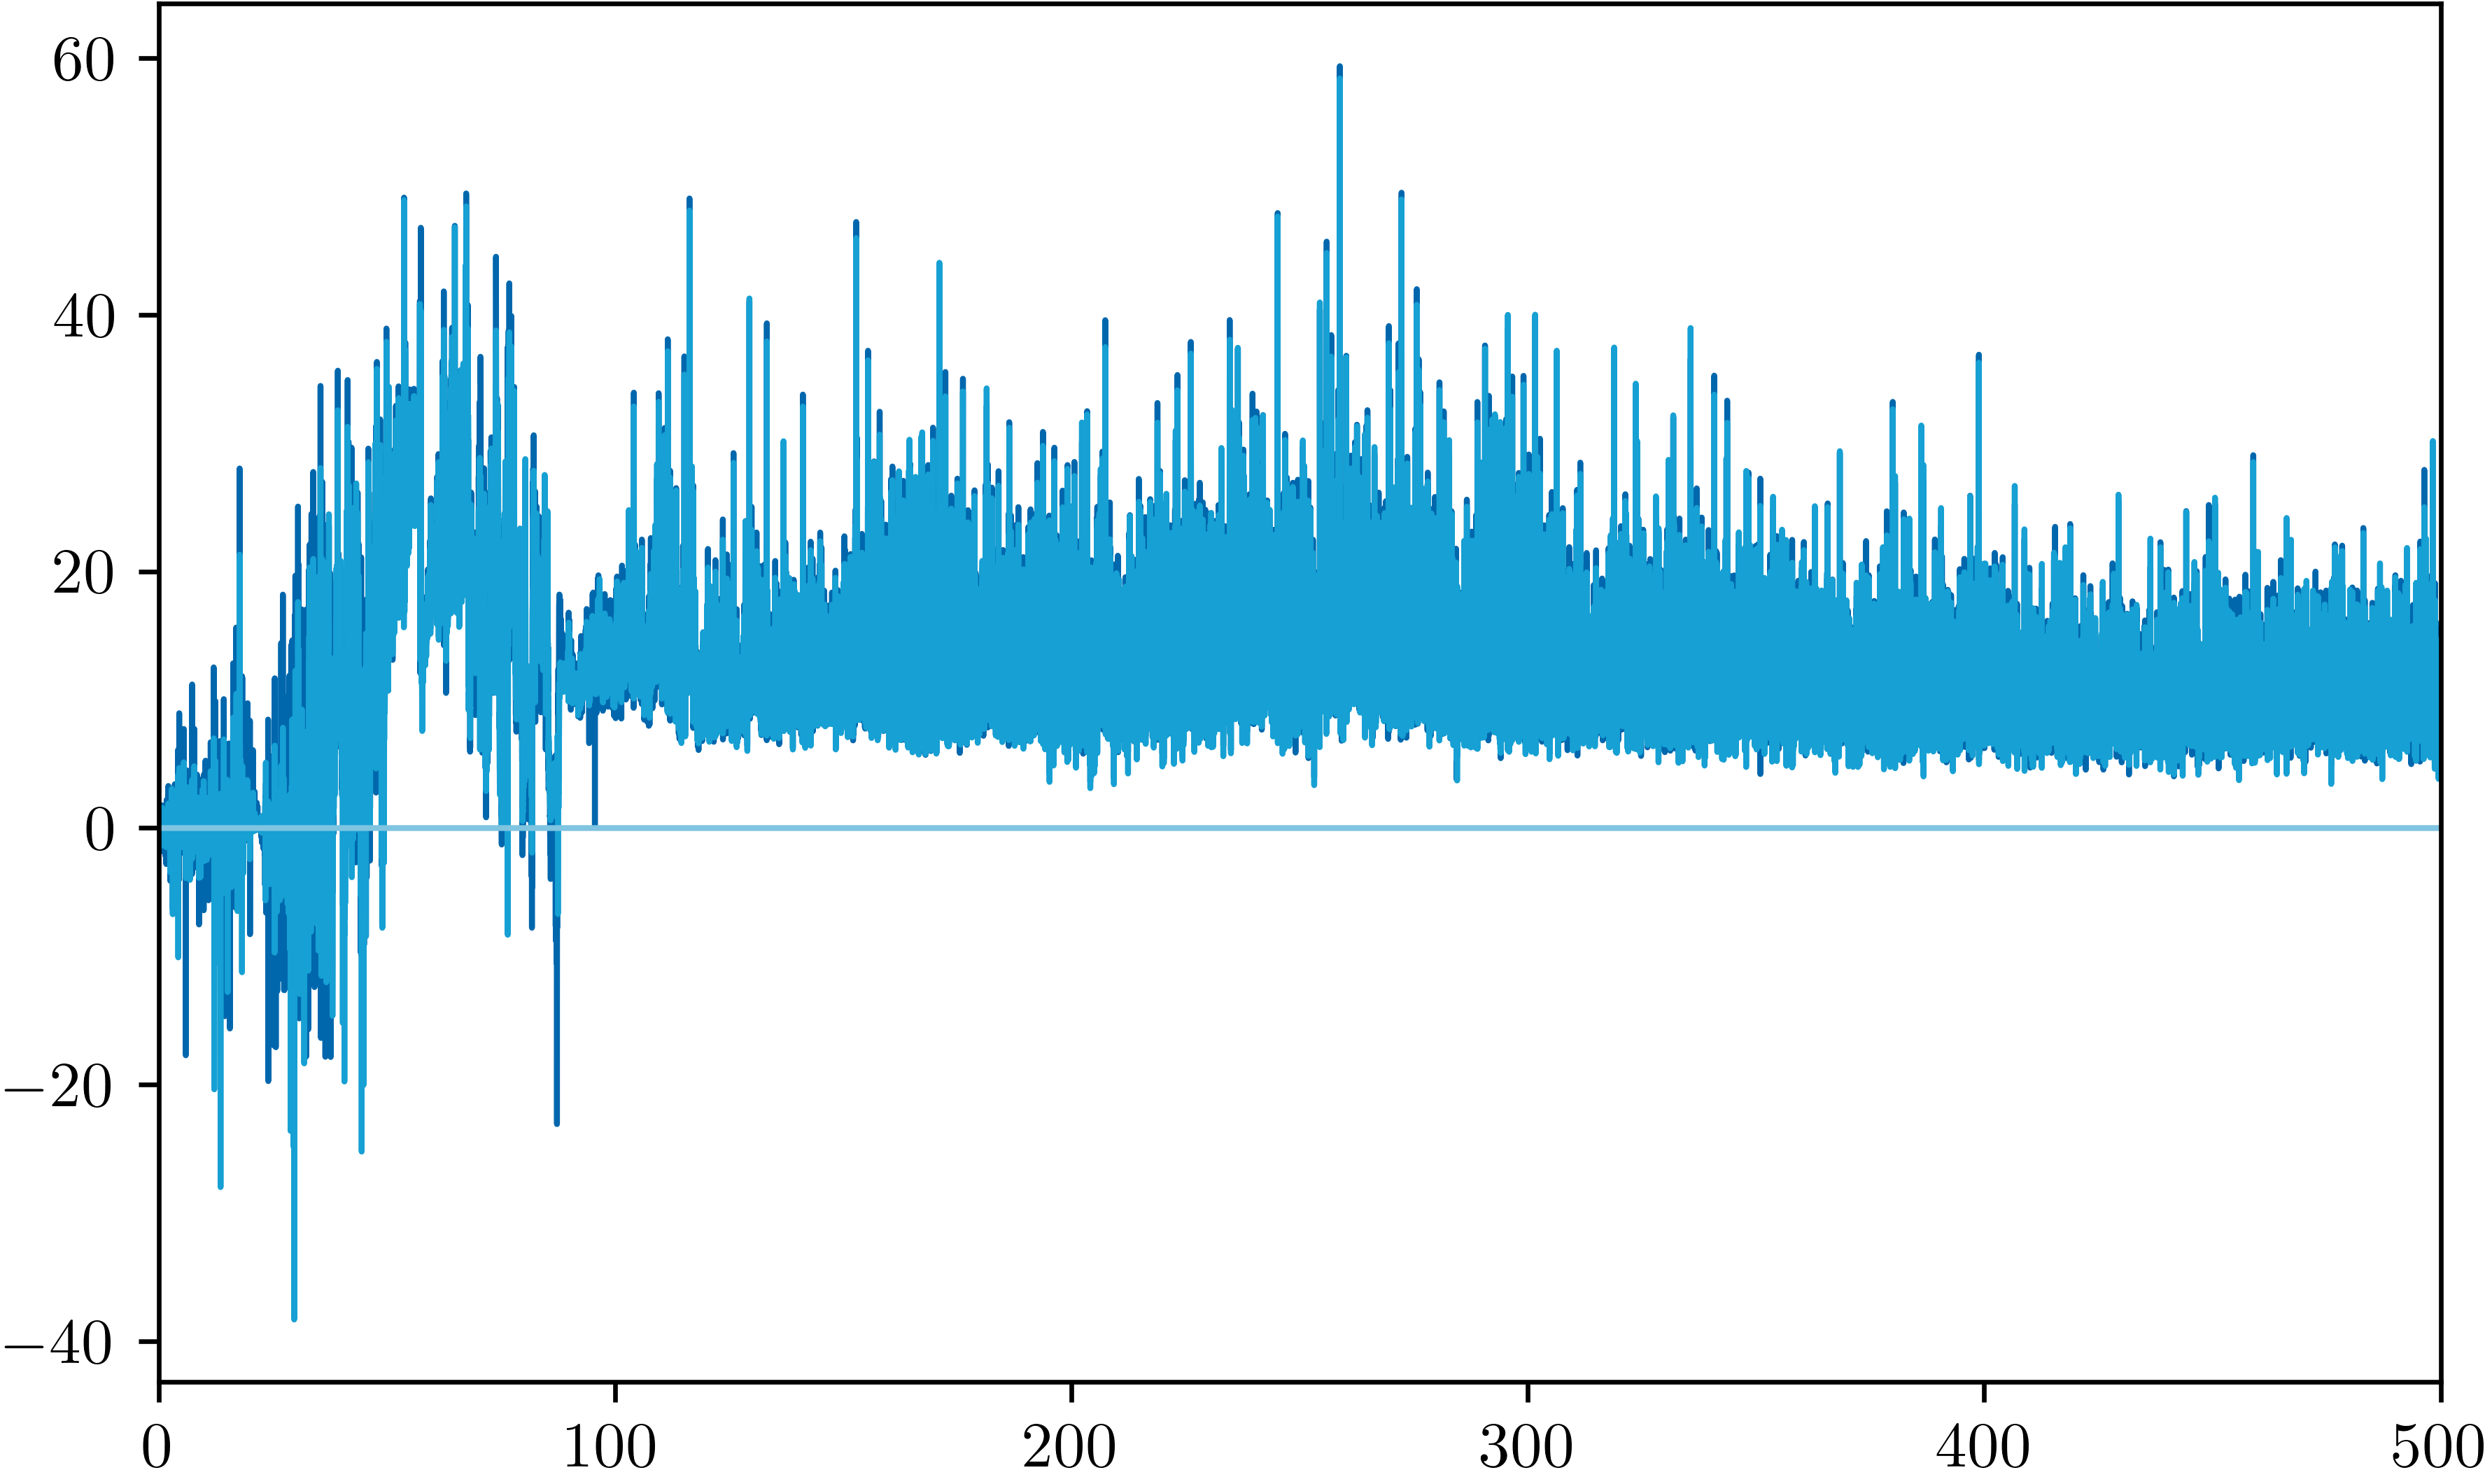

In [7]:
plt.plot(d_4K['s'],d_4K['R11t']-d_RT['R11t'],
             c=cpd.images(color='seeblau')(.35),
             label='$T_{FNR}=4\,$K')
plt.plot(d_160K['s'],d_160K['R11t']-d_RT['R11t'],
             c=cpd.images(color='seeblau')(.5),
             label='$T_{FNR}=161\,$K')
plt.plot(d_RT['s'],d_RT['R11t']-d_RT['R11t'],
             c=cpd.images(color='seeblau')(.65),
             label='$T_{FNR}=285\,$K')
plt.xlim([0,500])

In [8]:
d_160K['R11t']-d_RT['R11t']

array([ 0.12002754,  0.09514826,  0.09012758, ..., 11.81972054,
        9.64323198, 10.46266192])

In [8]:
d_4K['s']

array([0.00000000e+00, 2.08753657e-02, 4.17507315e-02, ...,
       2.08749482e+03, 2.08751570e+03, 2.08753657e+03])

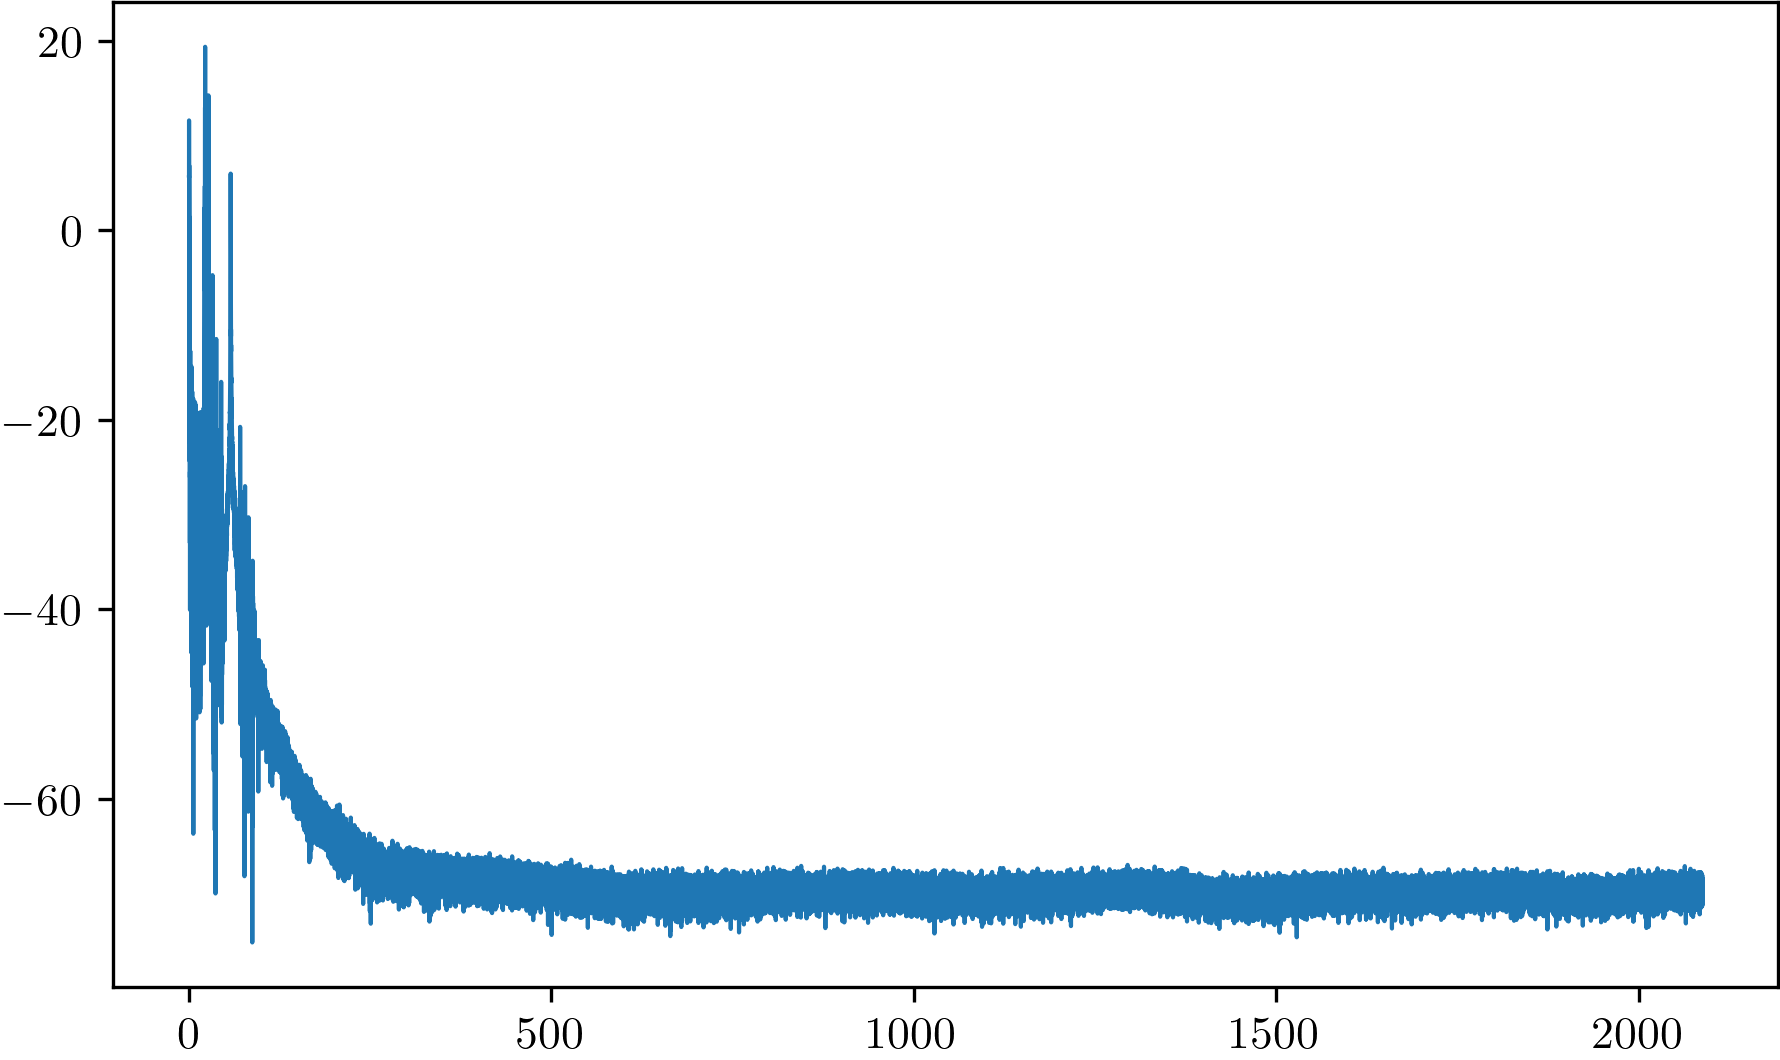

In [10]:
plt.plot(d_4K['s'],d_4K['R11t'])

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


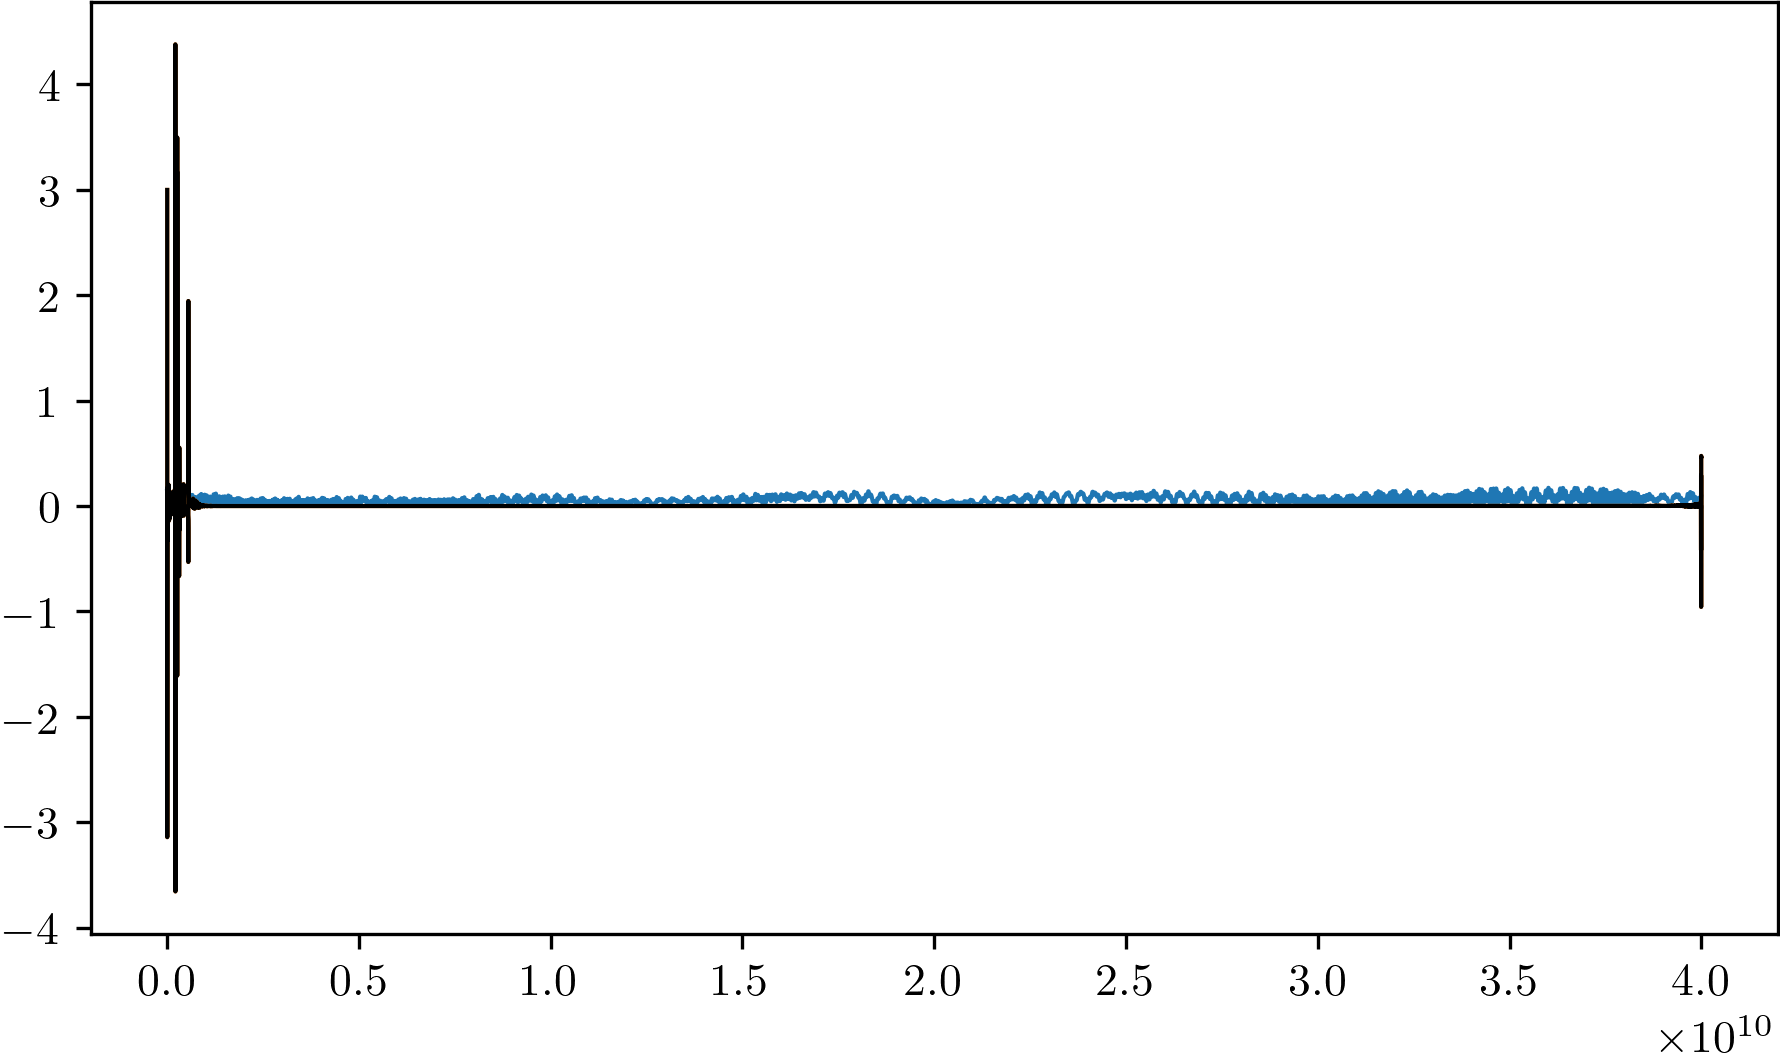

In [11]:
ef,eS=d_4K['f'], d_4K['S11f']
ef, eS
plt.plot(ef,np.abs(eS))
FS=np.fft.ifft(eS, norm='ortho')

t=np.fft.ifftshift(np.fft.fftfreq(len(ef),d=ef[1]-ef[0]))
plt.plot(ef,FS)
plt.plot(ef,FS, color='k')

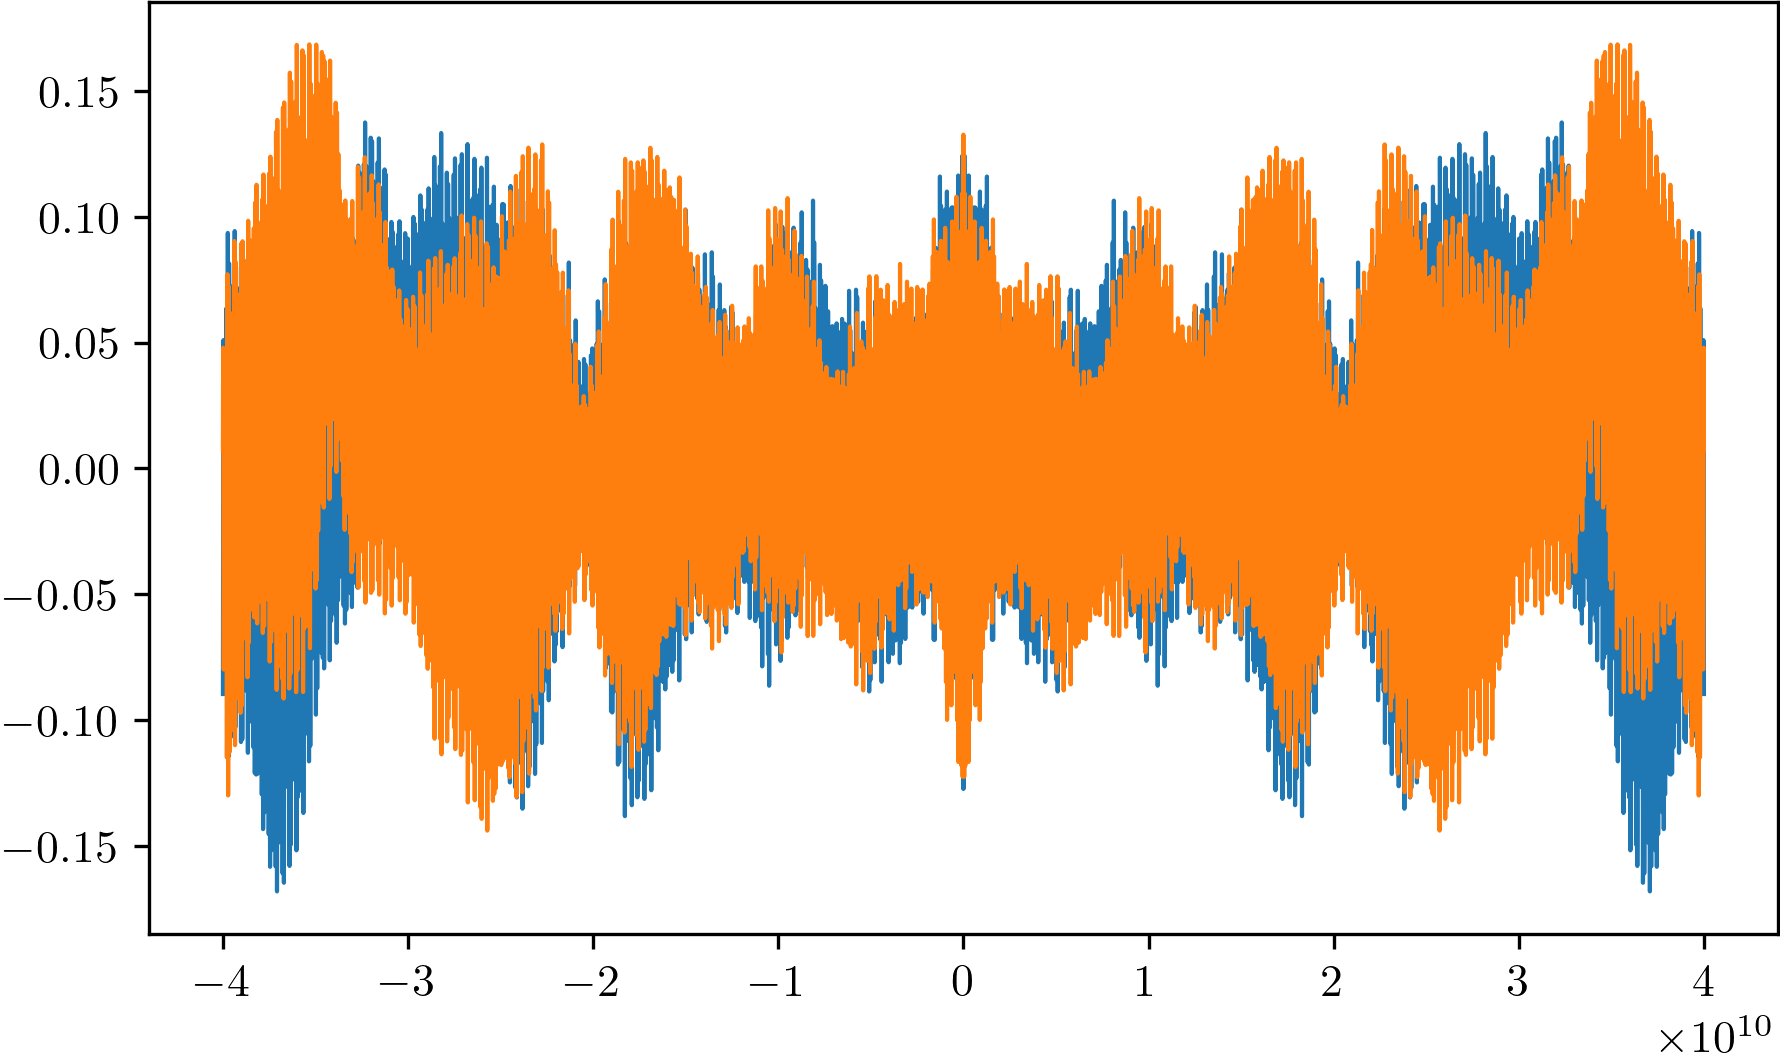

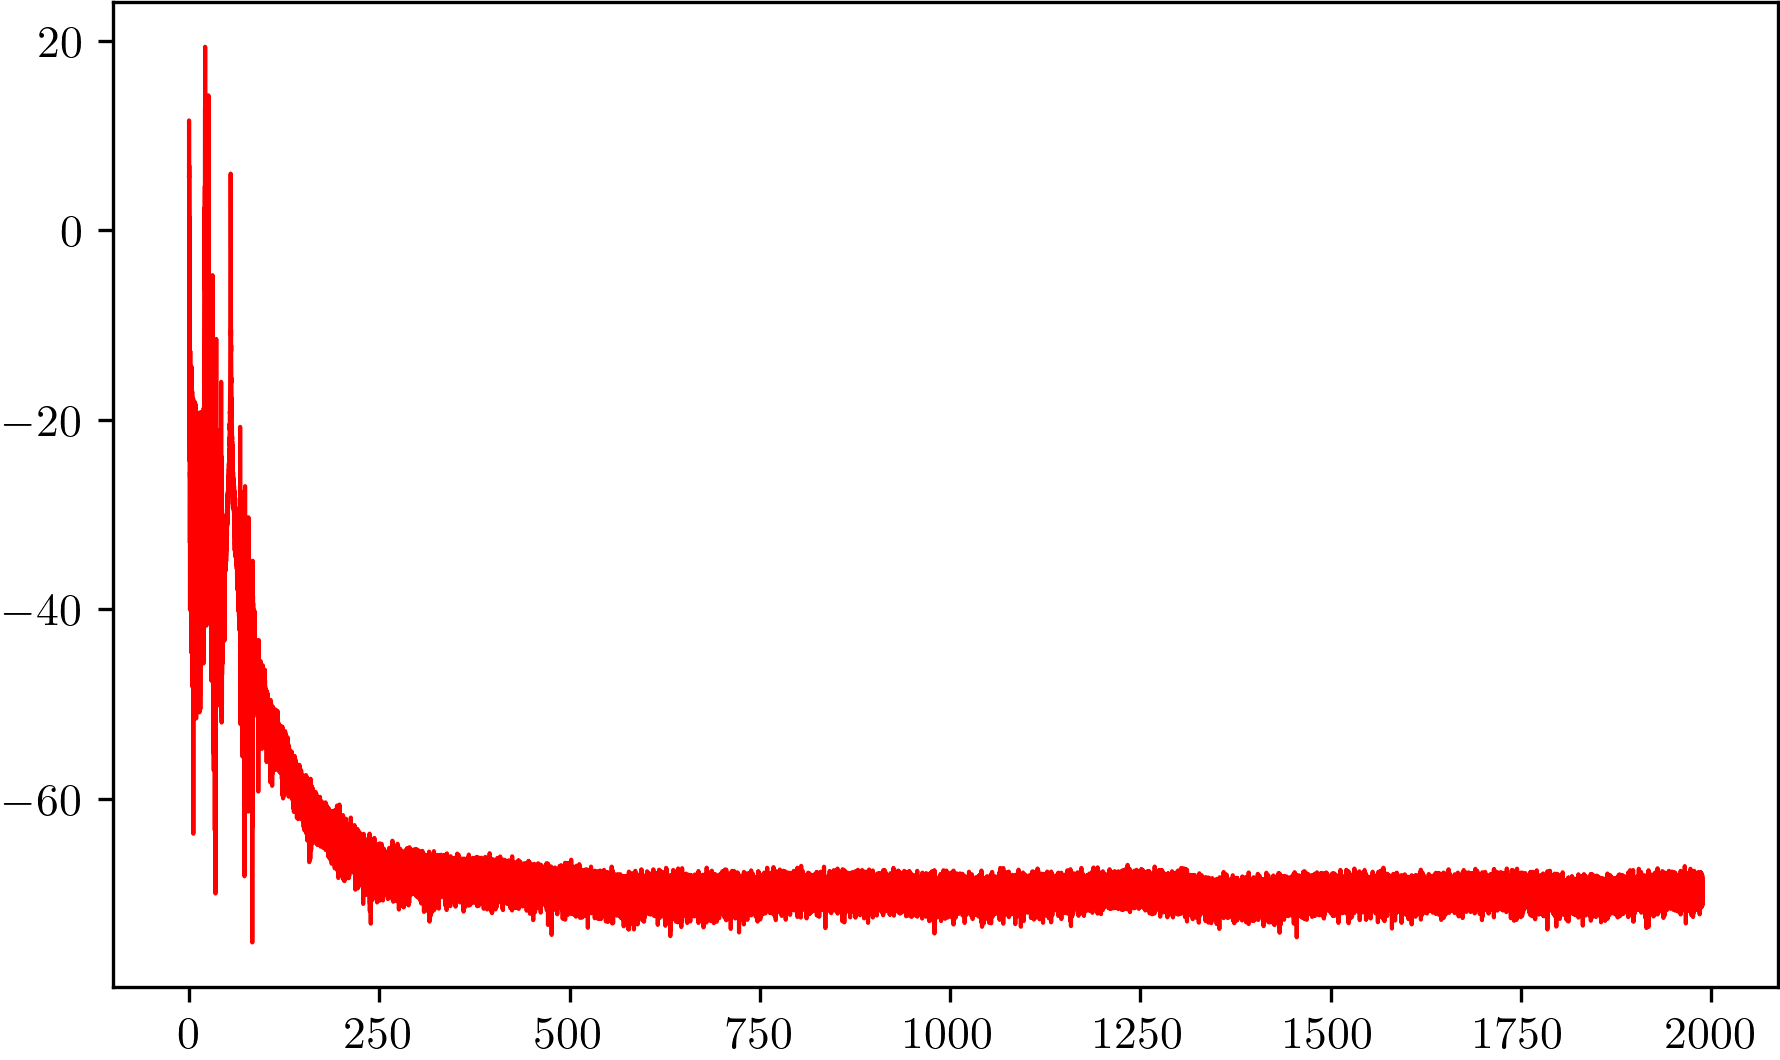

In [12]:
eSS=np.concatenate((np.flip(eS,axis=0),np.zeros(1),eS))
eff=np.concatenate((-np.flip(ef,axis=0),np.zeros(1),ef))
plt.close()
plt.plot(eff,eSS.imag,eff,eSS.real)


FFS=np.fft.ifft(eSS, norm='ortho')
t=np.fft.ifftshift(np.fft.fftfreq(len(eff),d=(eff[1]-eff[0])*2*np.pi))
s=t*speed_of_light*100/2*2/3
plt.close(2)
plt.figure(2)
plt.plot(s[100001:],20*np.log10(np.abs(np.flip(FFS[100001:],axis=0))),'r-')
#plt.xlim([0,80])

Text(0, 0.5, 'Reflexion $\\mathcal{F}\\{R_{11}(f)\\})$ [dB]')

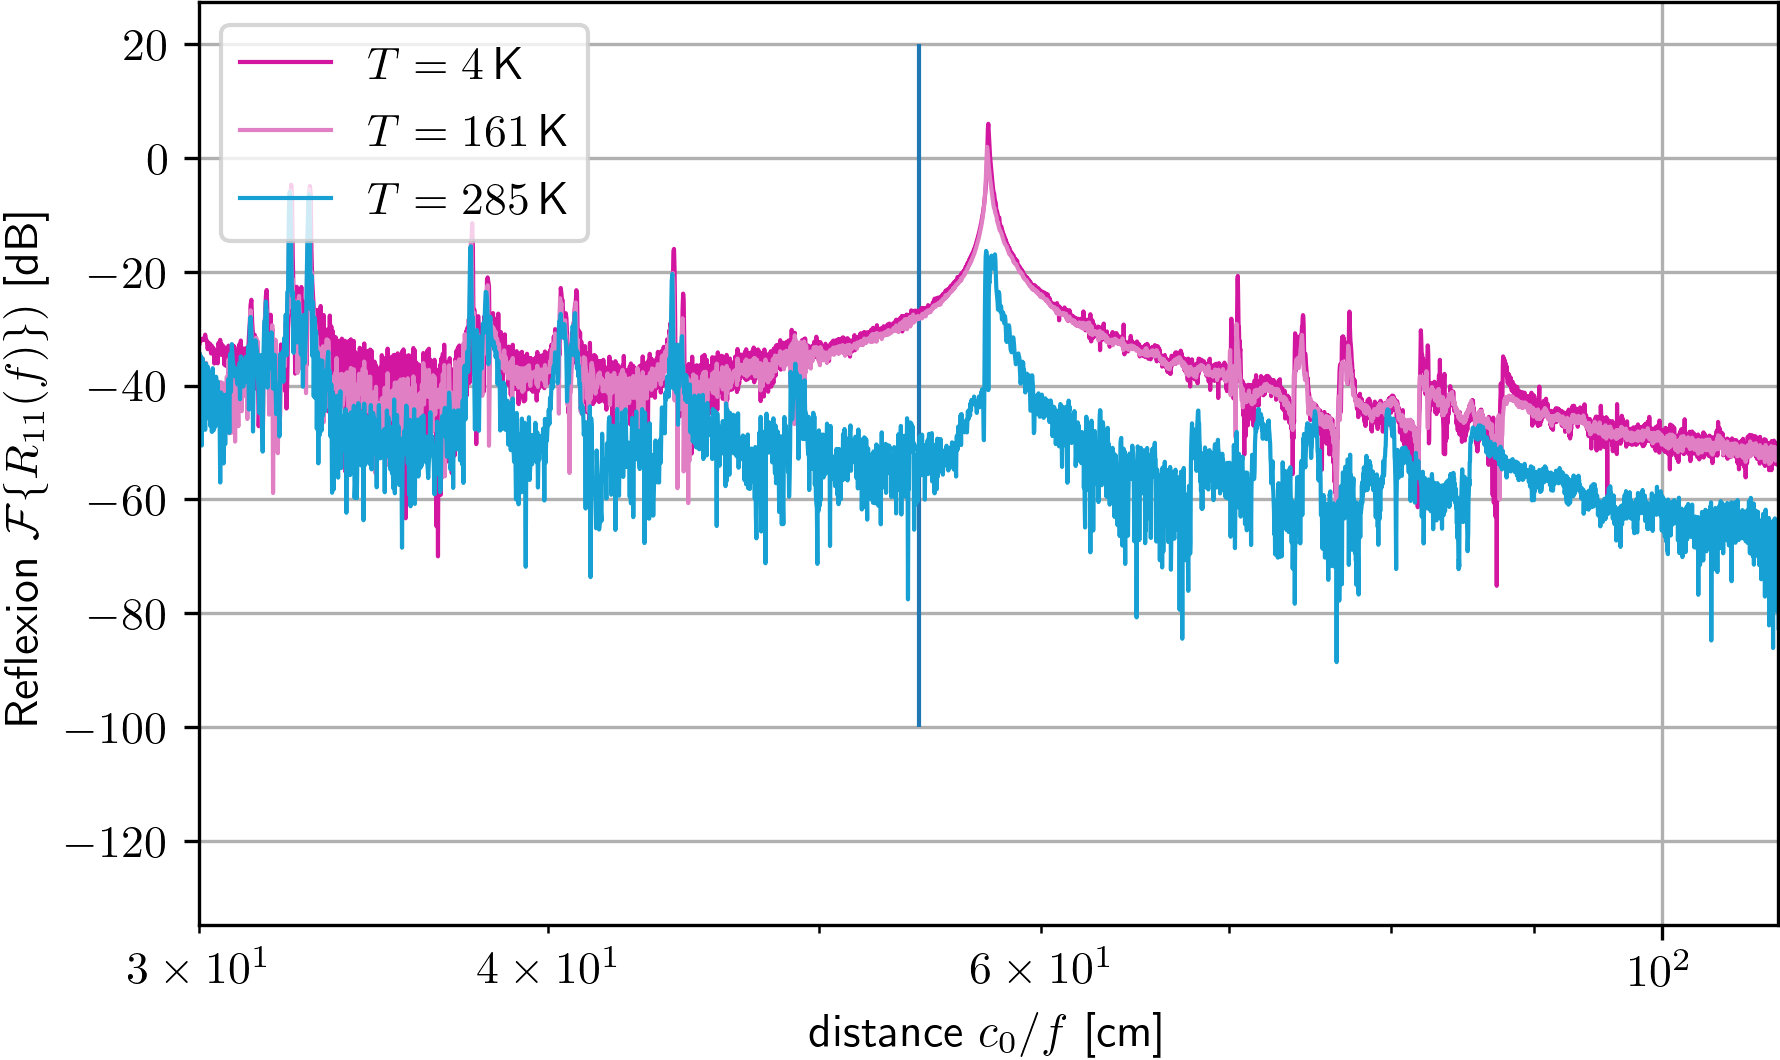

In [13]:

plt.semilogx(d_4K['s'],d_4K['R11t'],
             c=cpd.images(color='magenta')(.5),
             label='$T=4\,$K')
plt.semilogx(d_160K['s'],d_160K['R11t'],
             c=cpd.images(color='magenta')(.65),
             label='$T=161\,$K')
plt.semilogx(d_RT['s'],d_RT['R11t'],
             c=cpd.images()(.5),
             label='$T=285\,$K')
pos=54.2736
plt.vlines(pos,ymax=20, ymin=-100)
plt.xlim([30,110])

plt.legend(loc=2)
plt.grid()
plt.xlabel('distance $c_0/f$ [cm]')
plt.ylabel('Reflexion $\mathcal{F}\{R_{11}(f)\})$ [dB]')
#plt.savefig('test.pdf')

Text(0, 0.5, 'Reflexion $\\mathcal{F}\\{R_{22}(f)\\})$ [dB]')

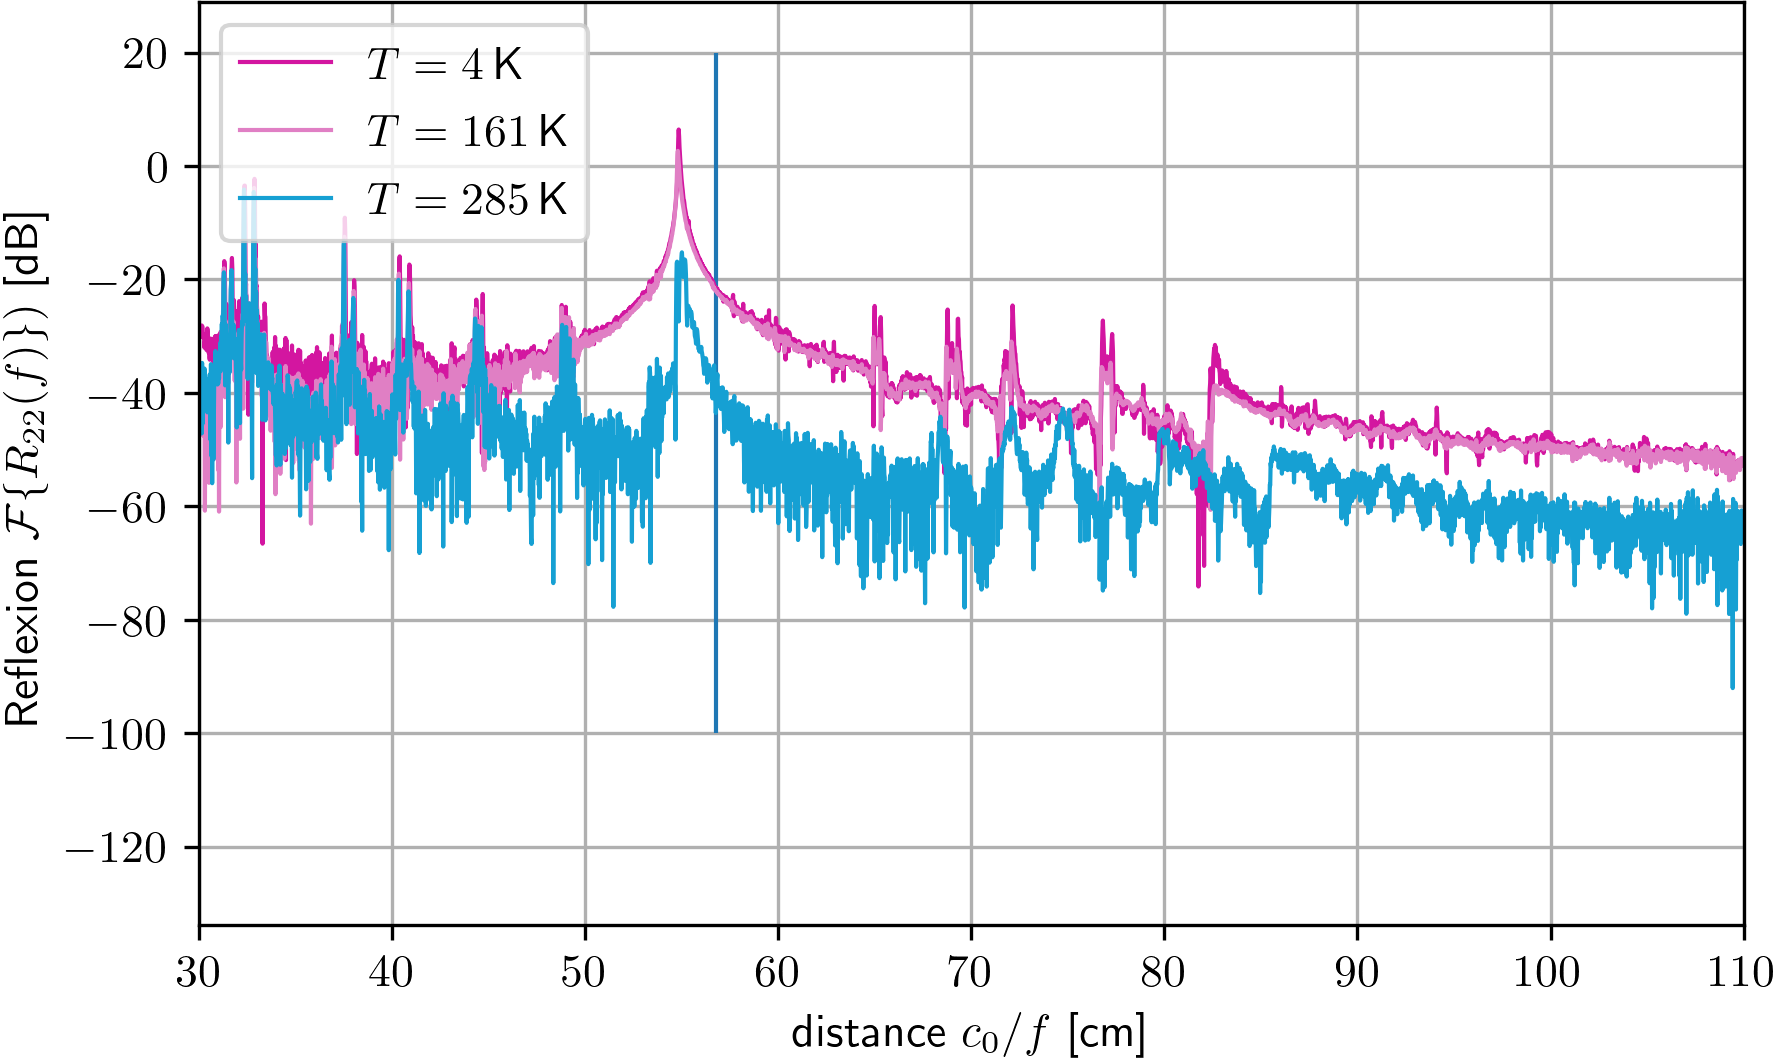

In [14]:
plt.plot(d_4K['s'],d_4K['R22t'],
             c=cpd.images(color='magenta')(.5),
             label='$T=4\,$K')
plt.plot(d_160K['s'],d_160K['R22t'],
             c=cpd.images(color='magenta')(.65),
             label='$T=161\,$K')
plt.plot(d_RT['s'],d_RT['R22t'],
             c=cpd.images()(.5),
             label='$T=285\,$K')
pos=56.7817
plt.vlines(pos,ymax=20, ymin=-100)
plt.xlim([30,110])

plt.legend(loc=2)
plt.grid()
plt.xlabel('distance $c_0/f$ [cm]')
plt.ylabel('Reflexion $\mathcal{F}\{R_{22}(f)\})$ [dB]')